In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk
import pandas as pd
from funciones import gradienteRosenbrock, hessianoRosenbrock, gradienteDescendente, newtonRaphson, rosenbrock

plt.style.use('figs.mplstyle')
plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 24,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'figure.figsize': [10, 6]
})

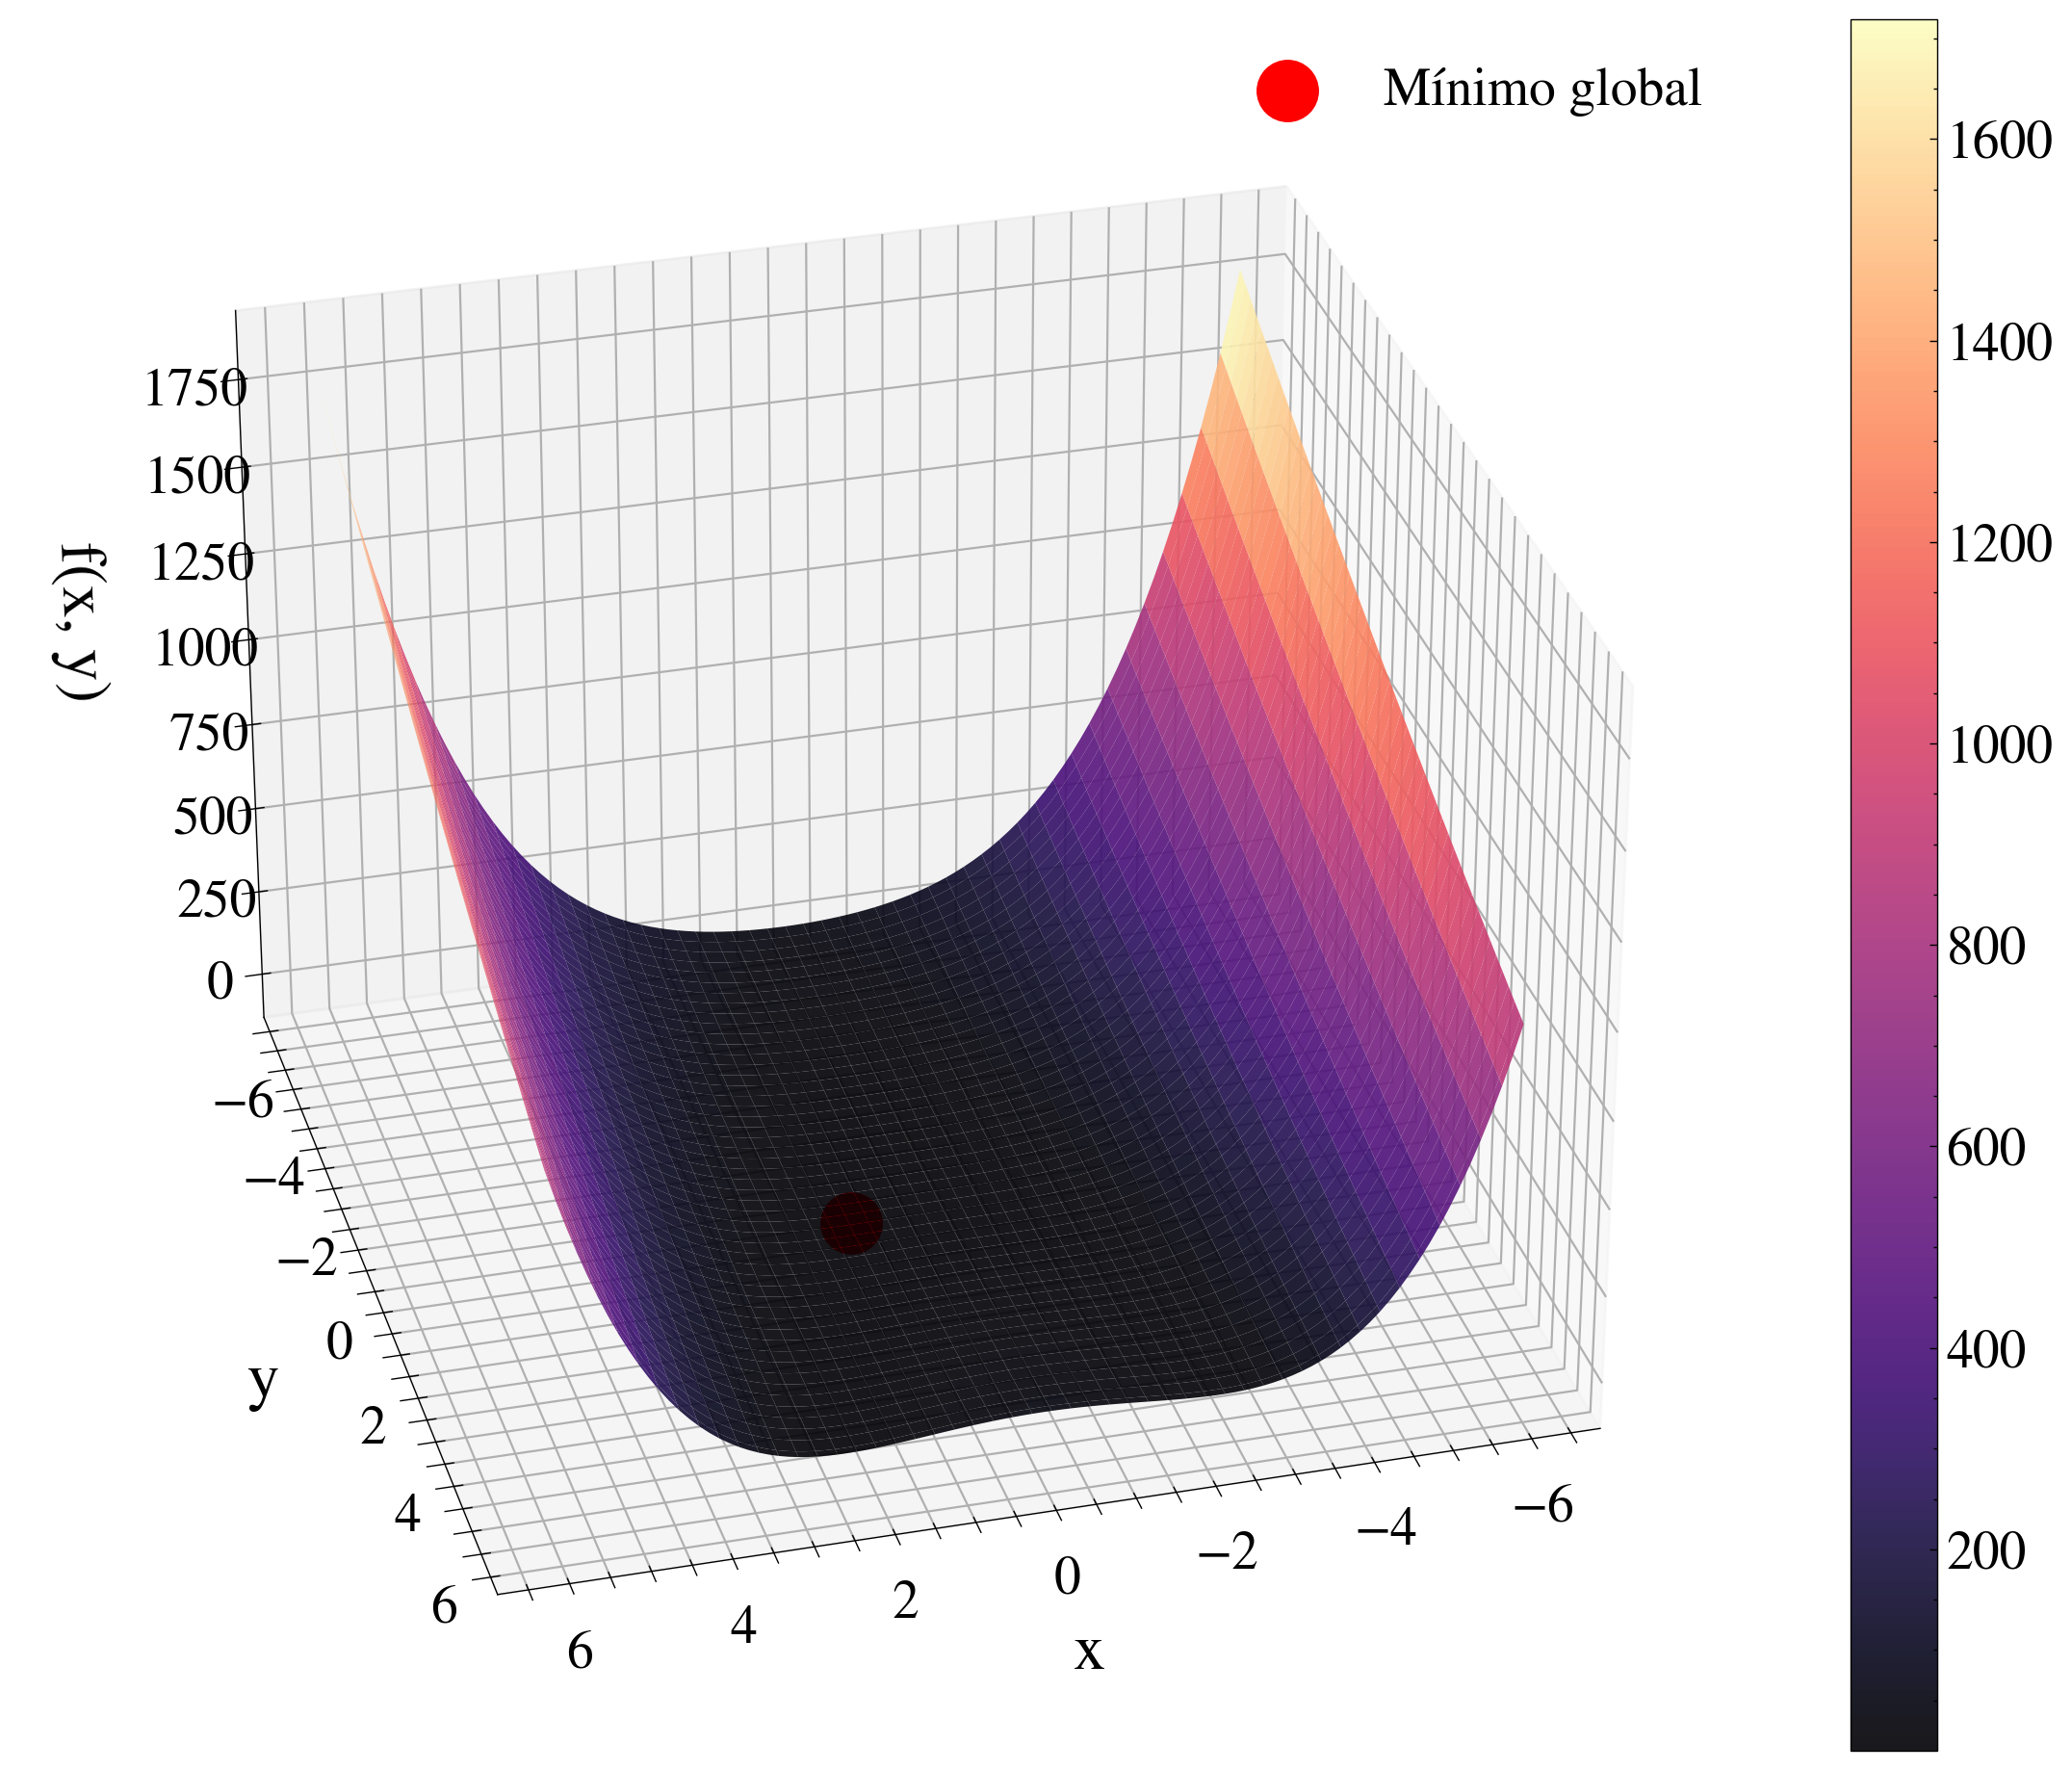

In [2]:
a = 1
b = 1

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y,a,b)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, Z, cmap='magma', alpha=0.9)

ax.scatter(1, 1, 0, 
          color='red', 
          s=500, 
          label='Mínimo global',
          zorder=2)

ax.view_init(elev=30, azim=75)

ax.set_xlabel('x', labelpad=15)
ax.set_ylabel('y', labelpad=15)
ax.set_zlabel('f(x, y)', labelpad=25)
fig.colorbar(surface)
ax.legend()
plt.savefig('../Figures/funcionRosenbrock.png')
plt.show()

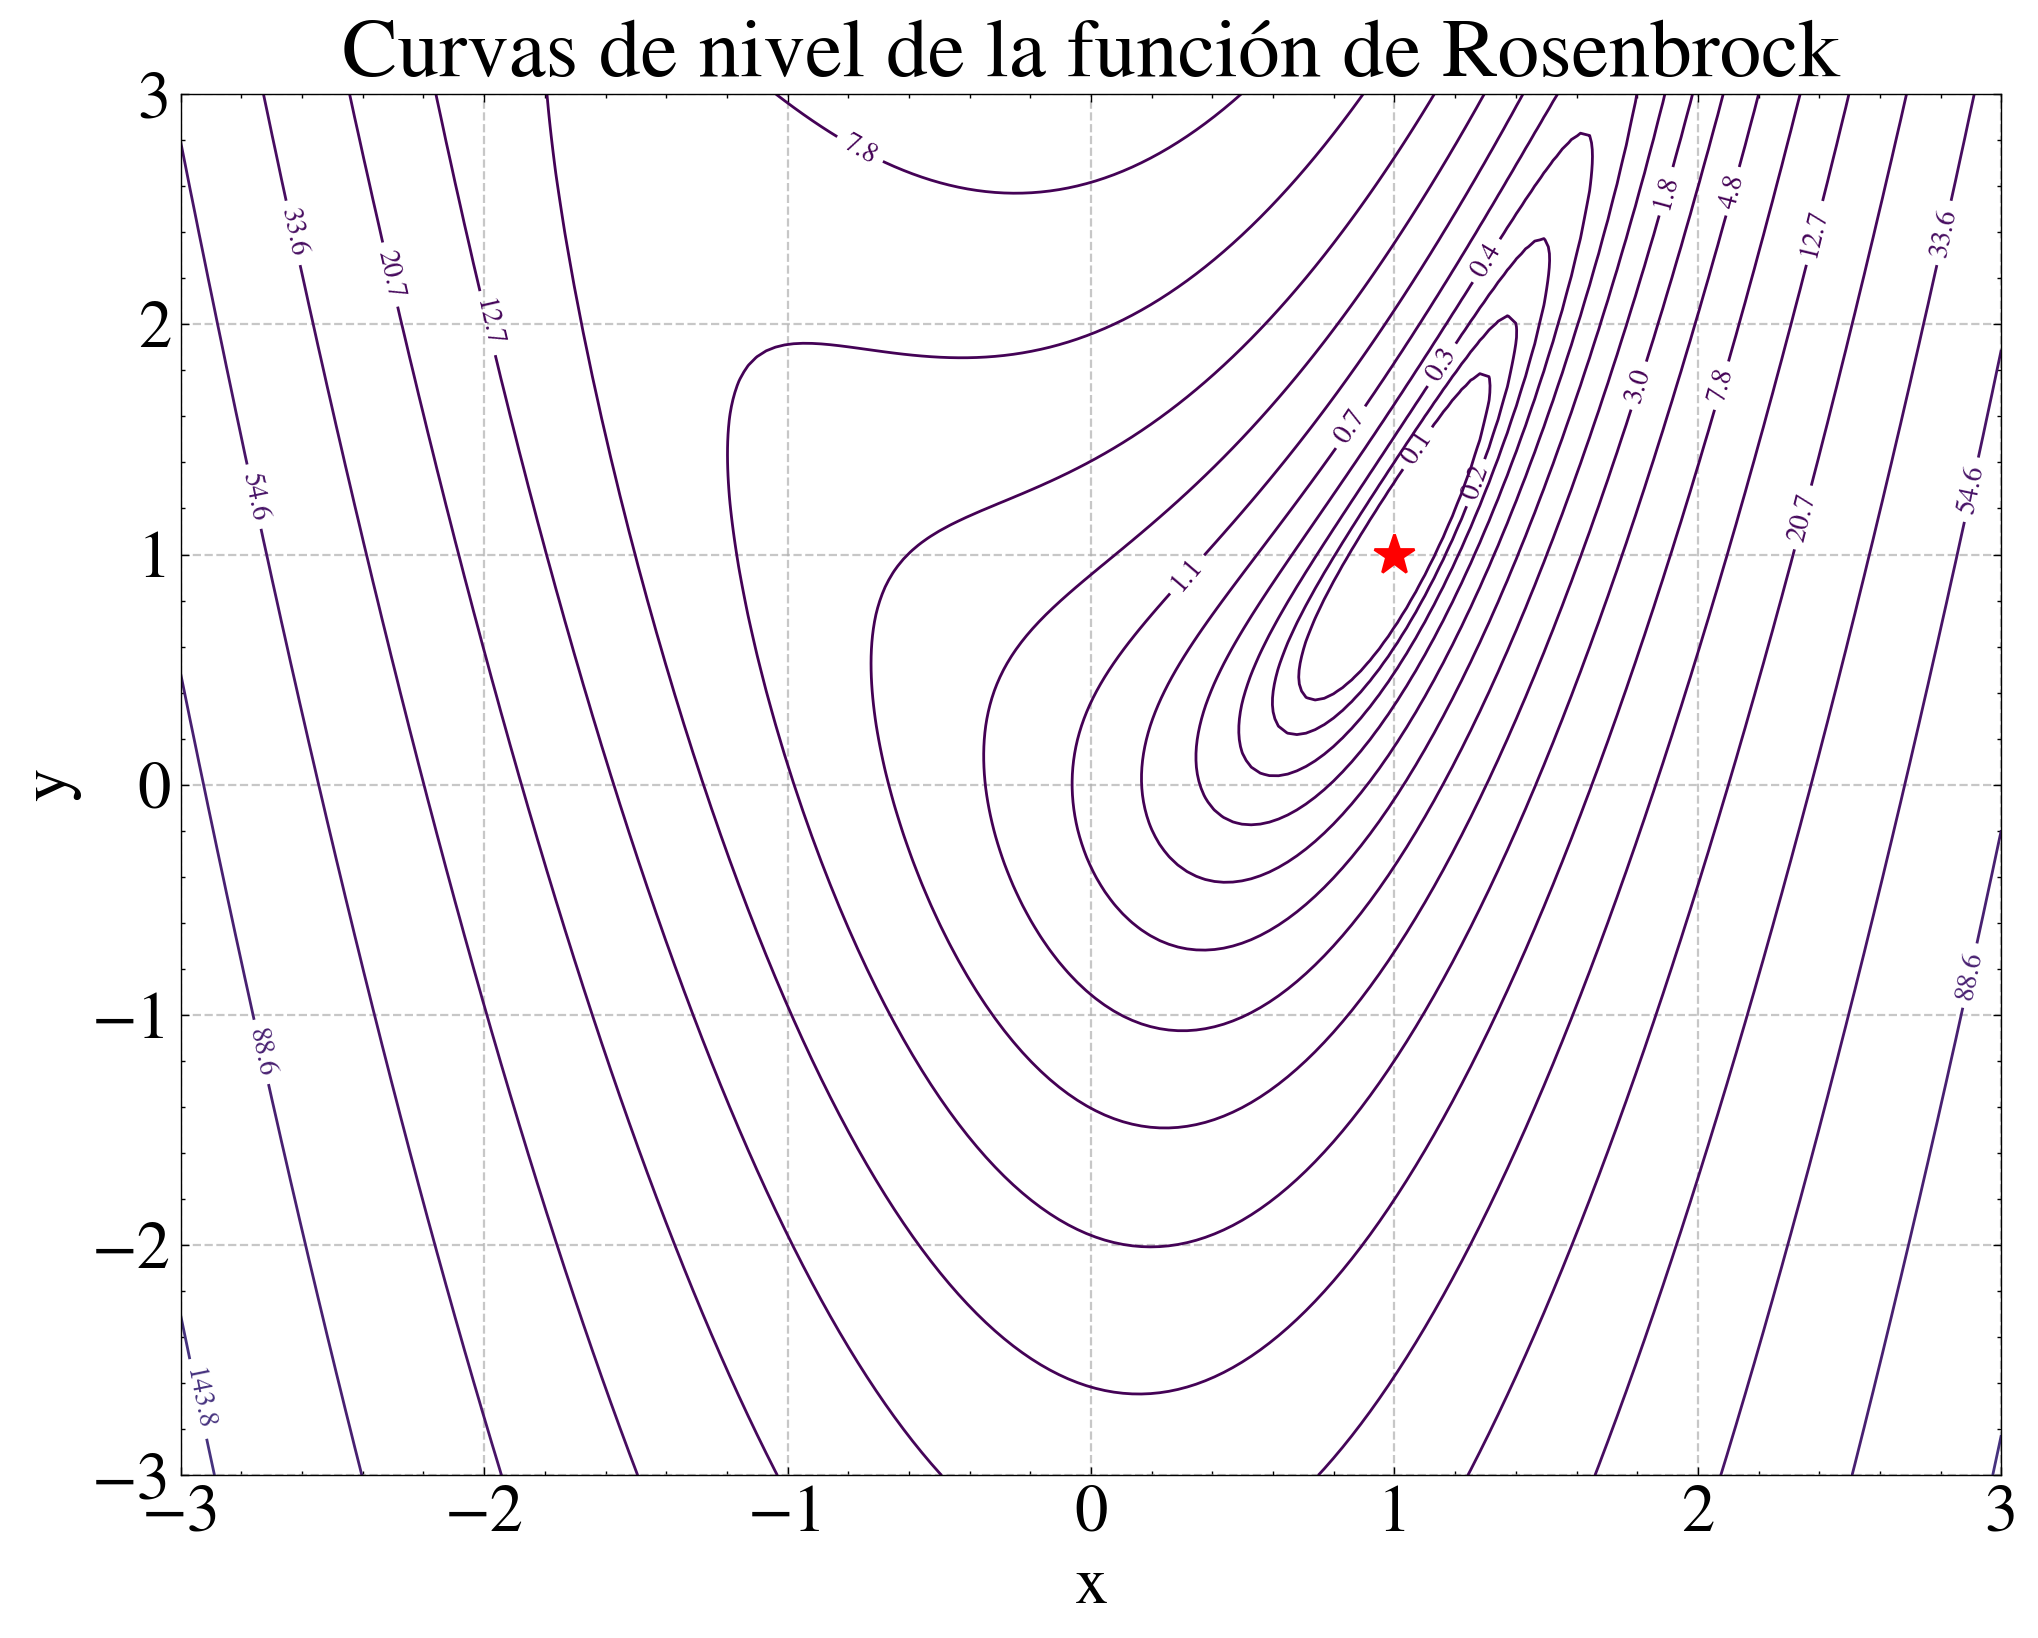

In [3]:
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y,a,b)

fig, ax = plt.subplots(figsize=(10, 8))
levels = np.logspace(-1, 3, 20)
contours = ax.contour(X, Y, Z, levels=levels, cmap='viridis')
ax.clabel(contours, inline=True, fontsize=10)
ax.plot(1, 1, 'r*', markersize=15, label='Mínimo global')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Curvas de nivel de la función de Rosenbrock', size=30)

plt.xticks(size=24)
plt.yticks(size=24)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

ax.grid(True, linestyle='--', alpha=0.7)
plt.savefig('../Figures/curvasRosenbrock.png')
plt.show()

In [4]:
learning_rates = np.logspace(-6, -2, 15) 
punto_inicial = np.array([-3, -3])
ground_truth = np.array([1, 1])

resultados = []

for lr in learning_rates:
    resultado, mensaje, _ = gradienteDescendente(gradienteRosenbrock, lr, punto_inicial)
    
    
    if np.all(np.isfinite(resultado)):
        distancia = np.linalg.norm(resultado - ground_truth)
    else:
        distancia = np.nan
        
    resultados.append({
        'Learning Rate': lr,
        'Condición de Corte': mensaje,
        'Distancia al Óptimo': distancia
    })

df = pd.DataFrame(resultados)
df['Learning Rate'] = df['Learning Rate'].apply(lambda x: f"{x:.2e}")
df['Distancia al Óptimo'] = df['Distancia al Óptimo'].apply(lambda x: f"{x:.8f}" if np.isfinite(x) else "nan")

print("\nComparación de Learning Rates:")
print(df.to_string(index=False))


Comparación de Learning Rates:
Learning Rate                 Condición de Corte                                                                                                                                       Distancia al Óptimo
     1.00e-06 Convergencia por step en iter 8217                                                                                                                                                1.80974600
     1.93e-06 Convergencia por step en iter 5958                                                                                                                                                1.60941760
     3.73e-06 Convergencia por step en iter 3970                                                                                                                                                1.50934226
     7.20e-06 Convergencia por step en iter 2517                                                                                                            

/home/santiago/laburo/optimization-algoritms/codigos/funciones.py:10: RuntimeWarning: overflow encountered in scalar multiply
  term2 = -4*b*x*(y-x**2)
/home/santiago/laburo/optimization-algoritms/codigos/funciones.py:10: RuntimeWarning: overflow encountered in scalar power
  term2 = -4*b*x*(y-x**2)
/home/santiago/laburo/optimization-algoritms/codigos/funciones.py:11: RuntimeWarning: overflow encountered in scalar power
  term3 = 2*b*(y-x**2)


In [5]:
puntosIniciales = [[1,1.5],[1.5,1], [2,3],[2,1],[1,2], [3,3]]

resultadosPuntosInciales = []   

for puntoInicial in puntosIniciales:
    resultado, mensaje, _ = gradienteDescendente(gradienteRosenbrock, 1e-3, puntoInicial)
    resultadosPuntosInciales.append({
        'Punto Inicial': puntoInicial,
        'Condición de Corte': mensaje,
        'Distancia GT': np.linalg.norm(resultado - ground_truth).round(8),
    })

df2 = pd.DataFrame(resultadosPuntosInciales)
df2['Punto Inicial'] = df2['Punto Inicial'].apply(lambda x: f"{x}")
df2['Distancia GT'] = df2['Distancia GT'].apply(lambda x: f"{x}")
df2['Condición de Corte'] = df2['Condición de Corte'].apply(lambda x: f"{x}")

print("\nComparación de Puntos Iniciales:")
print(df2.to_string(index=False))


Comparación de Puntos Iniciales:
Punto Inicial                 Condición de Corte Distancia GT
     [1, 1.5] Convergencia por step en iter 1301   0.28869498
     [1.5, 1]    Convergencia por step en iter 5   0.07907436
       [2, 3] Convergencia por step en iter 5051   0.28868699
       [2, 1] Convergencia por step en iter 3852   0.22049594
       [1, 2] Convergencia por step en iter 3608   0.28870617
       [3, 3]       Error: Overflow en gradiente          inf


/home/santiago/laburo/optimization-algoritms/codigos/funciones.py:10: RuntimeWarning: overflow encountered in scalar power
  term2 = -4*b*x*(y-x**2)
/home/santiago/laburo/optimization-algoritms/codigos/funciones.py:11: RuntimeWarning: overflow encountered in scalar power
  term3 = 2*b*(y-x**2)


/tmp/ipykernel_179033/3998622174.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('autumn'),


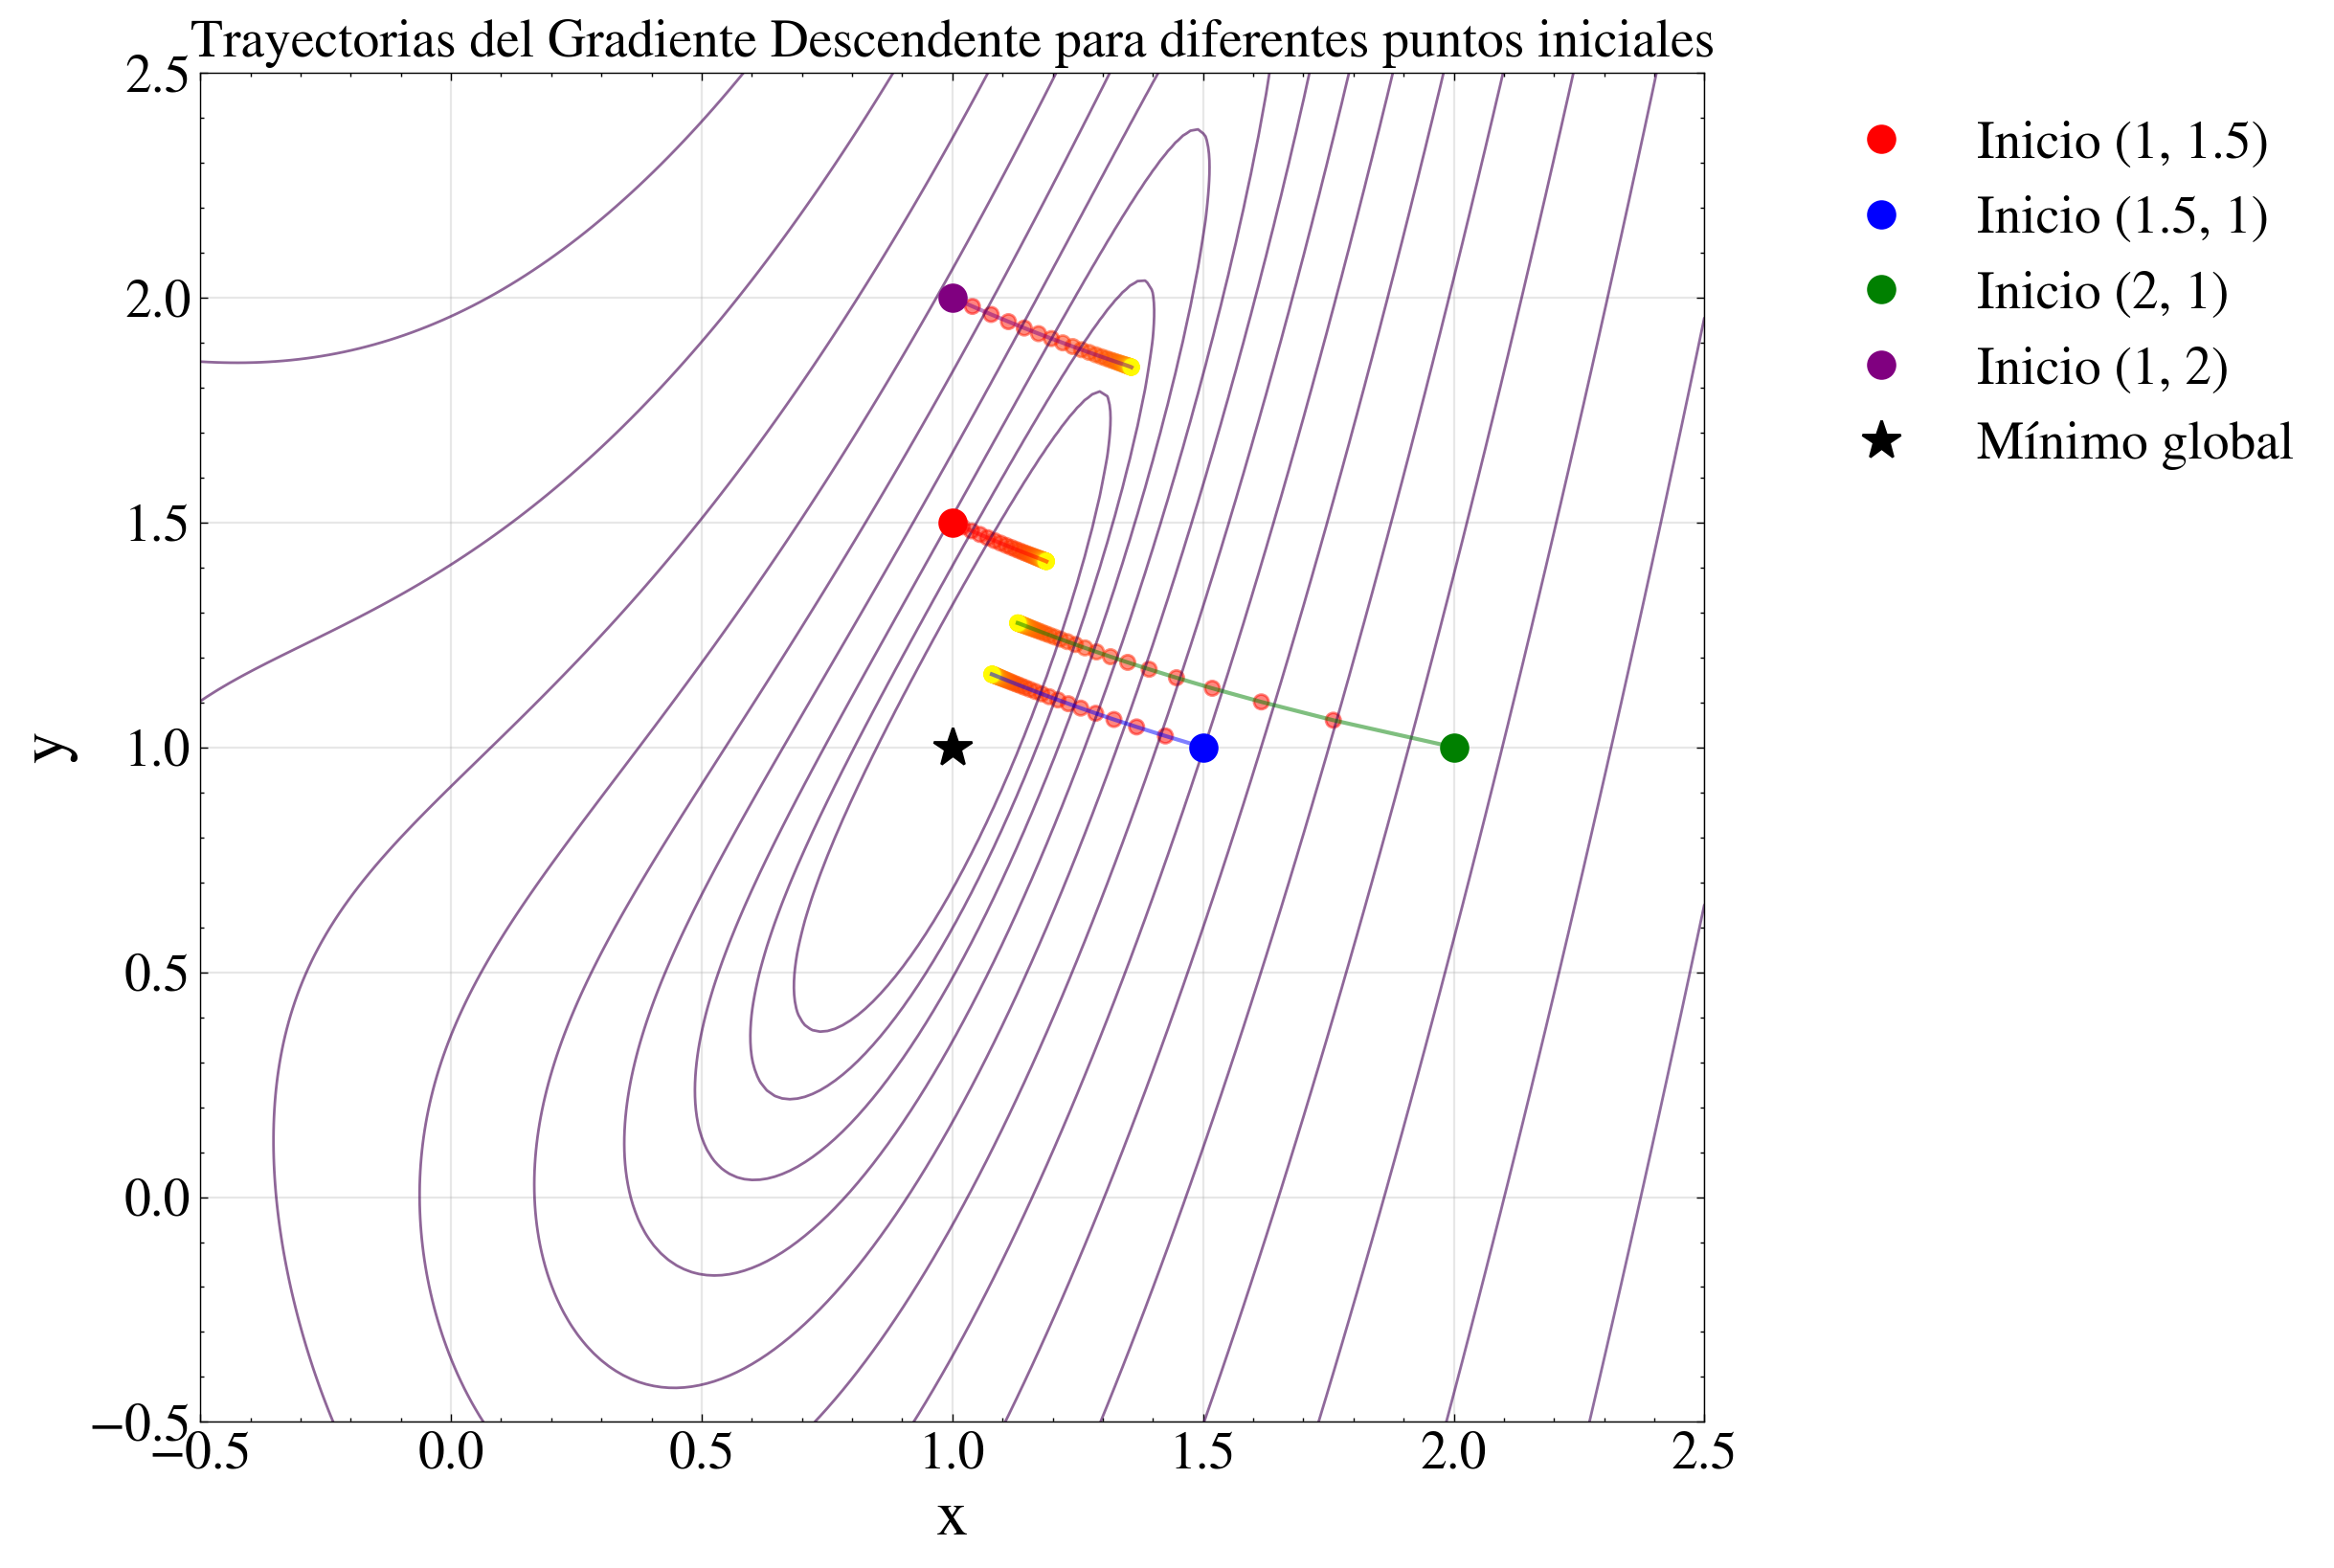

In [6]:
puntos_iniciales = [[1, 1.5], [1.5, 1], [2, 1], [1, 2]]

x = np.linspace(-0.5, 2.5, 200)
y = np.linspace(-0.5, 2.5, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y, a, b)

plt.figure(figsize=(12, 8))

levels = np.logspace(-1, 3, 20)
plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)

colores = ['red', 'blue', 'green', 'purple', 'orange']

for punto_inicial, color in zip(puntos_iniciales, colores):
    resultado, mensaje, history = gradienteDescendente(gradienteRosenbrock, 1e-4, punto_inicial, history=True)
    
    x_path = [point[0] for point in history]
    y_path = [point[1] for point in history]
    
    plt.plot(x_path, y_path, '-', color=color, alpha=0.5, linewidth=1.5)
    plt.scatter(x_path, y_path, c=np.arange(len(x_path)), 
               cmap=plt.cm.get_cmap('autumn'), 
               s=30, alpha=0.5)
    
    plt.plot(punto_inicial[0], punto_inicial[1], 'o', color=color, 
            label=f'Inicio ({punto_inicial[0]}, {punto_inicial[1]})', 
            markersize=10)

plt.plot(1, 1, '*', color='black', label='Mínimo global', markersize=15)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias del Gradiente Descendente para diferentes puntos iniciales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.xlim([-0.5, 2.5])
plt.ylim([-0.5, 2.5])
plt.savefig('../Figures/trayectoriasGradienteDescendente.png')
plt.show()

In [7]:
punto_inicial = np.array([2, 2])
ground_truth = np.array([1, 1])

resultadosNRH = []

sol, mensaje, _ = newtonRaphson(hessianoRosenbrock,
                               gradienteRosenbrock,
                               punto_inicial)

distancia = np.linalg.norm(sol - ground_truth)

df_newton = pd.DataFrame([{
    'Método': 'Newton-Raphson',
    'Condición de Corte': mensaje,
    'Distancia al Óptimo': f"{distancia:.8f}" if np.isfinite(distancia) else "nan"
}])

print("\nResultados de Newton-Raphson:")
print(df_newton.to_string(index=False))


Resultados de Newton-Raphson:
        Método               Condición de Corte Distancia al Óptimo
Newton-Raphson Convergencia gradiente en iter 5          0.00000000


In [8]:
puntosIniciales = [[1,1.5], [1.5,1], [2,3], [2,1], [1,2], [3,3]]
ground_truth = np.array([1, 1])

resultados = []

for punto in puntosIniciales:
    punto_inicial = np.array(punto)
    
    sol, mensaje, _ = newtonRaphson(hessianoRosenbrock,
                                   gradienteRosenbrock,
                                   punto_inicial)

    distancia = np.linalg.norm(sol - ground_truth)
    
    resultados.append({
        'Punto Inicial': f"({punto[0]}, {punto[1]})",
        'Condición de Corte': mensaje,
        'Distancia al Óptimo': distancia,
        'Convergió a': f"({sol[0]:.6f}, {sol[1]:.6f})"
    })


df = pd.DataFrame(resultados)
print(df.to_string(index=False))

convergidos = df['Distancia al Óptimo'].apply(lambda x: float(x) if x != "nan" else float('inf')) < 1e-4
print(f"\nResumen:")
print(f"Puntos que convergieron al óptimo: {convergidos.sum()} de {len(puntosIniciales)}")
print(f"Porcentaje de éxito: {(convergidos.sum()/len(puntosIniciales))*100:.1f}%")

Punto Inicial               Condición de Corte  Distancia al Óptimo          Convergió a
     (1, 1.5) Convergencia gradiente en iter 1         0.000000e+00 (1.000000, 1.000000)
     (1.5, 1)      Convergencia step en iter 4         3.140185e-16 (1.000000, 1.000000)
       (2, 3) Convergencia gradiente en iter 5         6.386369e-12 (1.000000, 1.000000)
       (2, 1)      Convergencia step en iter 4         0.000000e+00 (1.000000, 1.000000)
       (1, 2) Convergencia gradiente en iter 1         0.000000e+00 (1.000000, 1.000000)
       (3, 3) Convergencia gradiente en iter 5         2.220446e-16 (1.000000, 1.000000)

Resumen:
Puntos que convergieron al óptimo: 6 de 6
Porcentaje de éxito: 100.0%


/tmp/ipykernel_179033/1949257184.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('winter'),


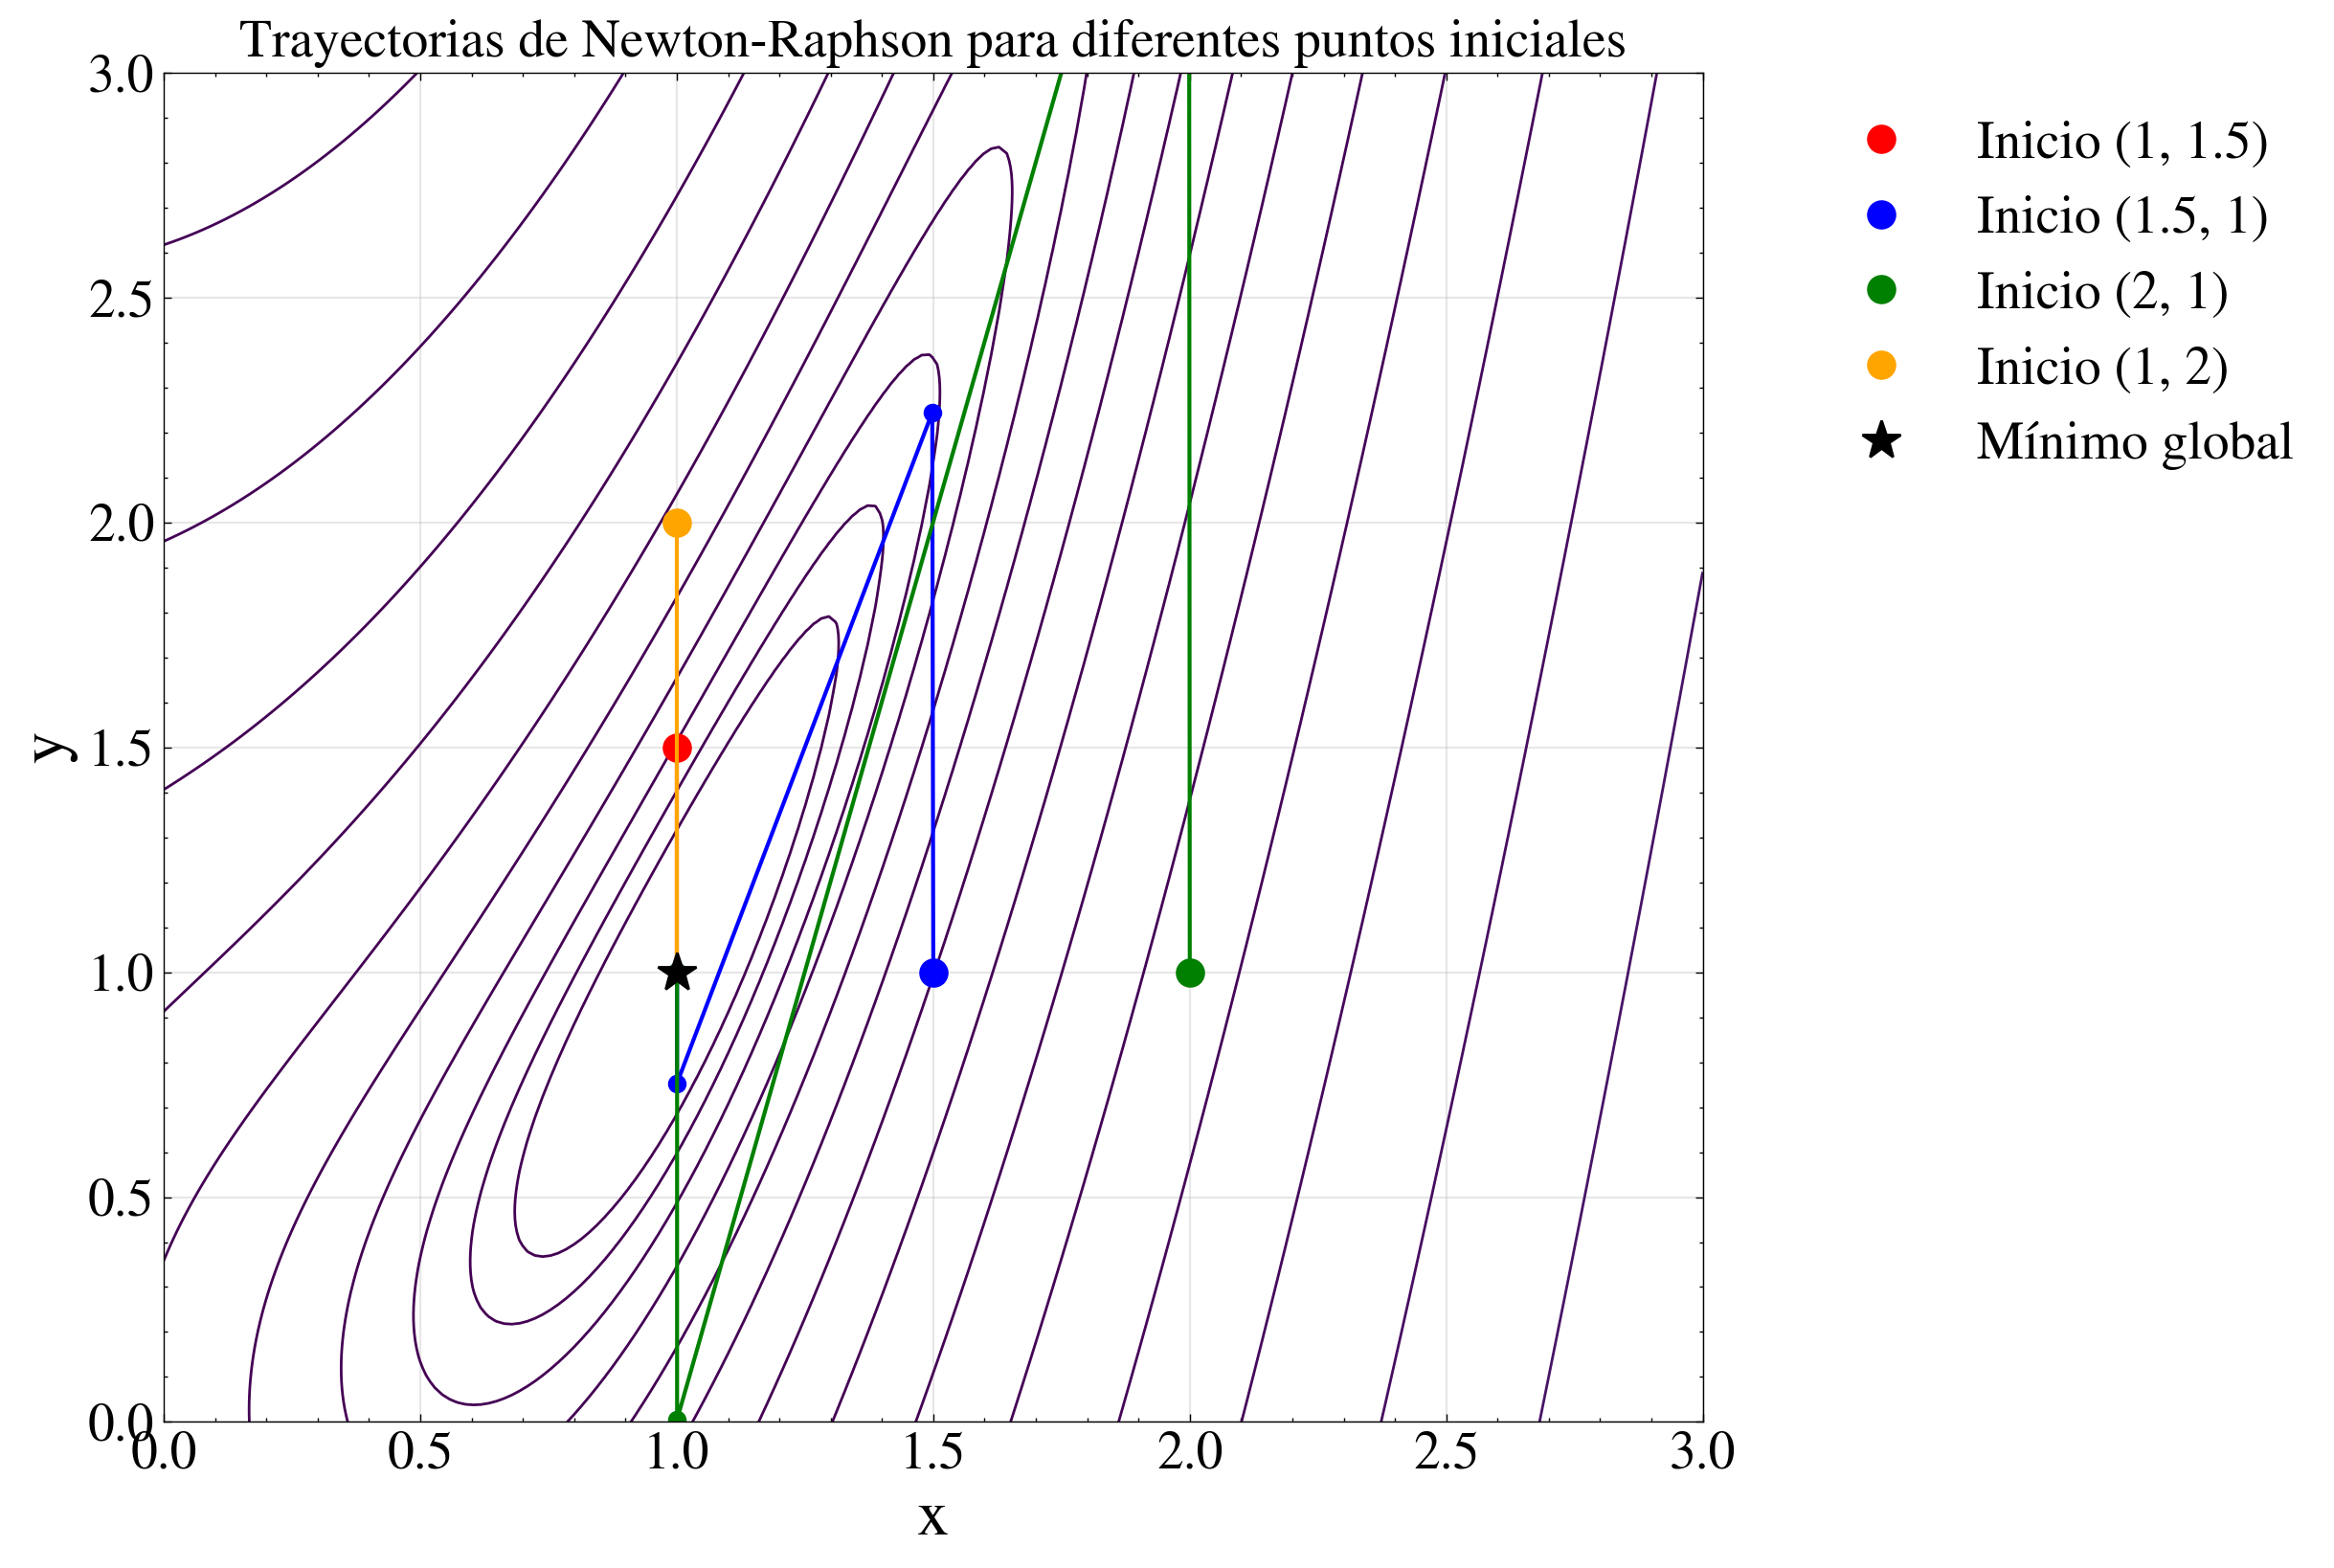

In [9]:
# Crear el grid para el contour plot de la función Rosenbrock
x = np.linspace(0, 3, 200)
y = np.linspace(0, 3, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y, a, b)

# Crear la figura
plt.figure(figsize=(12, 8))


levels = np.logspace(-1, 3, 20)
plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=1)

puntos_iniciales = [[1, 1.5], [1.5, 1], [2, 1], [1, 2]]
colores = ['red', 'blue', 'green', 'orange']

for punto_inicial, color in zip(puntos_iniciales, colores):
    resultado, mensaje, history = newtonRaphson(hessianoRosenbrock, 
                                              gradienteRosenbrock, 
                                              punto_inicial, 
                                              history=True)
    

    if history:
        x_path = [point[0] for point in history]
        y_path = [point[1] for point in history]
        
       
        plt.plot(x_path, y_path, '-o', color=color, alpha=1, linewidth=1.5)
        
        # Marcar los puntos intermedios con un gradiente de color
        plt.scatter(x_path, y_path, 
                   c=np.arange(len(x_path)),
                   cmap=plt.cm.get_cmap('winter'),
                   s=30, alpha=0.5)
        
       
        plt.plot(punto_inicial[0], punto_inicial[1], 'o', 
                color=color,
                label=f'Inicio ({punto_inicial[0]}, {punto_inicial[1]})',
                markersize=10)
        

plt.plot(1, 1, '*', color='black', label='Mínimo global', markersize=15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias de Newton-Raphson para diferentes puntos iniciales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim([0, 3])
plt.ylim([0, 3])
plt.savefig('../Figures/trayectoriasNewtonRaphson.png')
plt.show()